<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap07a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 例題7.1

教科書では手入力した少数のデータでニューラルネットワークの学習を行っていますが、ここでは乱数を用いて発生させたデータを学習データとして、scikit-learnの[MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)を用いてニューラルネットワークの学習を行います。

データの準備と表示

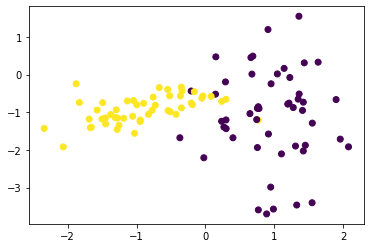

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from mlxtend.plotting import plot_decision_regions

X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=23)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

scikit-learnの[MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)で学習。パラメータはデフォルトとします。

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


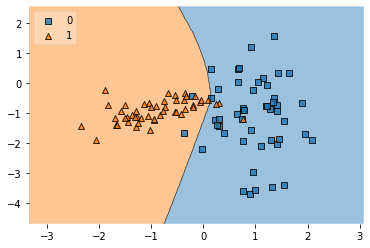

In [3]:
clf = MLPClassifier()
clf.fit(X,y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

デフォルトの繰返し回数200回では誤差関数が収束していないという警告が出ています。インスタンス生成時の引数max_iterの値を少し大きく指定してみます。

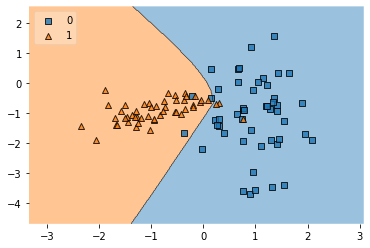

In [4]:
clf2 = MLPClassifier(max_iter=500)
clf2.fit(X,y)
plot_decision_regions(X=X, y=y, clf=clf2, legend=2)

識別面は変化していますが、性能はあまり変わらないように見えます。

## 課題

ネットワーク構造を変化させ、勾配消失が起きる状況を確認せよ。また、この勾配消失が起きたネットワークの活性化関数を変化させることで学習が可能になることを確認せよ。

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


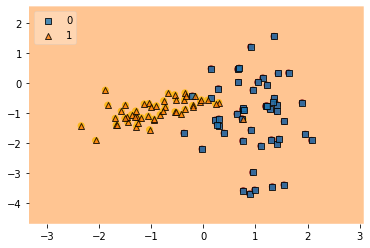

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from mlxtend.plotting import plot_decision_regions

X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=23)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

# 隠れ層のユニット数:4、階層数；8、活性化関数:シグモイド、エポック数:10000
clf3 = MLPClassifier(hidden_layer_sizes=(4,8), activation='logistic', learning_rate_init=0.001, max_iter=10000)
clf3.fit(X,y)
plot_decision_regions(X=X, y=y, clf=clf3, legend=2)

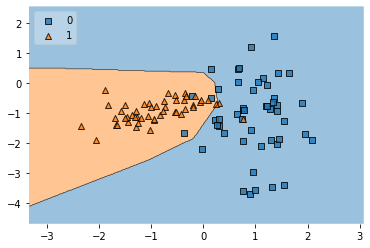

In [6]:
# 隠れ層のユニット数:4、階層数；8、活性化関数:ReLU、エポック数:1000
clf4 = MLPClassifier(hidden_layer_sizes=(4,8), activation='relu', learning_rate_init=0.001, max_iter=1000)
clf4.fit(X,y)
plot_decision_regions(X=X, y=y, clf=clf4, legend=2)